In [0]:
import tensorflow as tf

In [0]:
from sklearn.datasets import load_digits

In [0]:
mnist=load_digits()

In [8]:
mnist

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [12]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
X=mnist.data

In [14]:
X.shape

(1797, 64)

In [0]:
y=mnist.target

In [16]:
y.shape

(1797,)

In [0]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(X,y)

In [18]:
trainx.shape

(1347, 64)

In [19]:
trainy.shape

(1347,)

In [0]:
input_layer=tf.keras.layers.Input(shape=(trainx.shape[1:]))

In [0]:
dense_1=tf.keras.layers.Dense(64,
                              kernel_initializer=tf.keras.initializers.Zeros(),
                              bias_initializer=tf.keras.initializers.RandomNormal(),
                              activation='relu')(input_layer)

In [0]:
dense_2=tf.keras.layers.Dense(32,
                              kernel_initializer=tf.keras.initializers.Zeros(),
                              bias_initializer=tf.keras.initializers.RandomNormal(),
                              activation='relu')(dense_1)

In [0]:
output_layer=tf.keras.layers.Dense(10,activation='softmax')(dense_2)

In [0]:
model=tf.keras.models.Model(input_layer,output_layer)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history=model.fit(trainx,trainy,epochs=50,validation_split=0.1)

Epoch 1/50
38/38 [==============================] - 0s 6ms/step - loss: 2.1877 - accuracy: 0.1073 - val_loss: 1.9890 - val_accuracy: 0.1556
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 1.9877 - accuracy: 0.1972 - val_loss: 1.9071 - val_accuracy: 0.1778
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 1.8949 - accuracy: 0.2739 - val_loss: 1.7757 - val_accuracy: 0.2667
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 1.7226 - accuracy: 0.3424 - val_loss: 1.5435 - val_accuracy: 0.3926
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 1.4418 - accuracy: 0.4191 - val_loss: 1.2987 - val_accuracy: 0.4370
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 1.1742 - accuracy: 0.5149 - val_loss: 1.0524 - val_accuracy: 0.5926
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 0.9387 - accuracy: 0.6609 - val_loss: 0.8103 - val_accuracy: 0.7185
Epoch 8/50
38/38 [==

In [31]:
model.evaluate(testx,testy)

15/15 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9644


[0.18939940631389618, 0.9644444584846497]

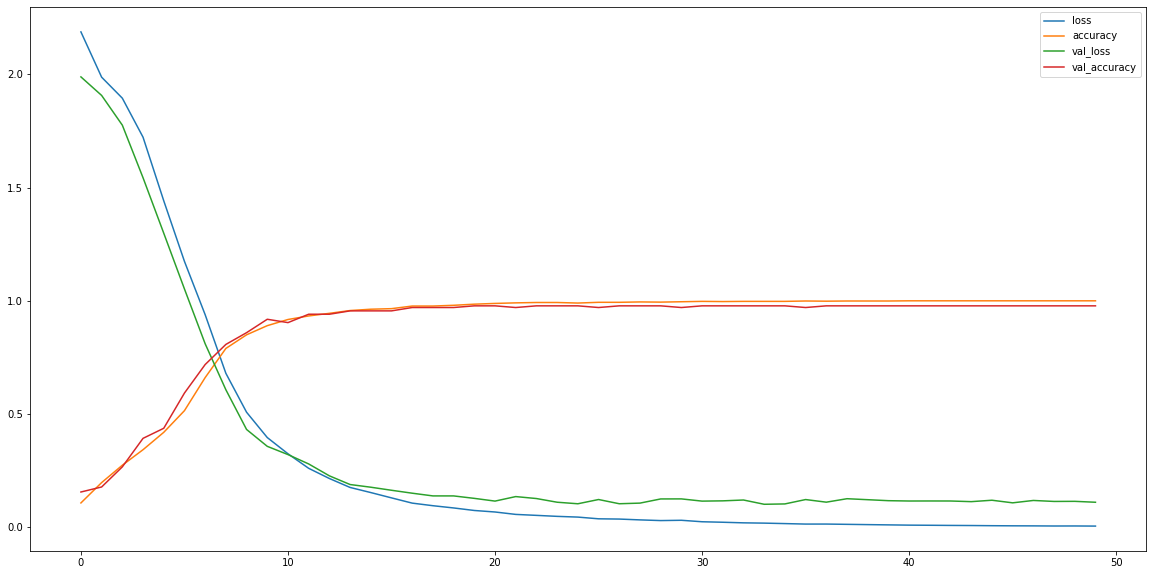

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(kind='line',figsize=(20,10))

In [0]:
dense_1=tf.keras.layers.Dense(64,
                              bias_initializer=tf.keras.initializers.Zeros(),
                              kernel_initializer=tf.keras.initializers.RandomNormal(),
                              activation='relu')(input_layer)
dense_2=tf.keras.layers.Dense(32,
                              bias_initializer=tf.keras.initializers.Zeros(),
                              kernel_initializer=tf.keras.initializers.RandomNormal(),
                              activation='relu')(dense_1)
output_layer=tf.keras.layers.Dense(10,activation='softmax')(dense_2)
model2=tf.keras.models.Model(input_layer,output_layer)                            

In [47]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/50
38/38 [==============================] - 0s 4ms/step - loss: 1.5238 - accuracy: 0.5569 - val_loss: 0.6934 - val_accuracy: 0.8519
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.9101 - val_loss: 0.2520 - val_accuracy: 0.9333
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9381 - val_loss: 0.1873 - val_accuracy: 0.9333
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9604 - val_loss: 0.1675 - val_accuracy: 0.9333
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9703 - val_loss: 0.1477 - val_accuracy: 0.9185
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9752 - val_loss: 0.1144 - val_accuracy: 0.9481
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9802 - val_loss: 0.1117 - val_accuracy: 0.9481
Epoch 8/50
38/38 [==

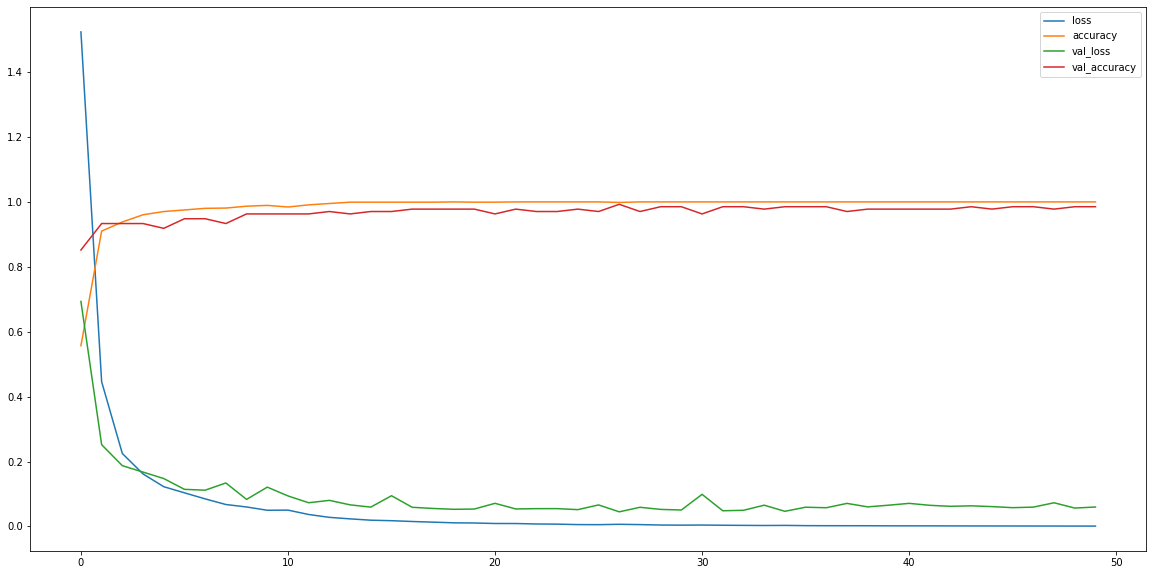

In [49]:
history=model2.fit(trainx,trainy,epochs=50,validation_split=0.1)
pd.DataFrame(history.history).plot(kind='line',figsize=(20,10))

In [50]:
model2.evaluate(testx,testy)

15/15 [==============================] - 0s 1ms/step - loss: 0.1511 - accuracy: 0.9556


[0.15113139152526855, 0.9555555582046509]